In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([[0,0],[1,-1],[1,1],[2,-2],[2,0],[2,2],[2.5,0],[3,-3],[3,0],[3,3]])
t = np.array([1,1,1,1,-1,1,-1,1,-1,1])

idx0 = t==-1
idx1 = t==1

In [3]:
##Finding Which elements of z_in is positive!
def pos_finder(lst):
    return [i for i,x in enumerate(lst) if x>0]

## Calculating Separator Lines According to W,b
def line_coordinates(W,bias): 
    x = np.linspace(-3,3,num = 1000)
    y1 = -W[0,0]/W[0,1]*x + bias[0]/W[0,1]
    y2 = -W[1,0]/W[1,1]*x + bias[0]/W[1,1]
    return x,y1,y2

def perceptron(X,t,W,b,n,niter,alpha = 0.1):

    ##Output Layer
    v = 0.5*np.ones(n)
    b4 = 0.5*(n-2)

    ##Initializing Network I/O 
    z_in = np.zeros((n,1))
    z = np.zeros((n,1))
    out = np.zeros(t.shape)

    ##Loop Counters
    ix = 0
    ctr = 0
    ##Main Part

    while (ctr<niter):
        for x in X:        ##Iterating On every Input
            ix = ix%10
            for i in range(n):
                z_in[i] = np.dot(W[i],x.T) + b[i]
                z[i] = 1 if z_in[i]>=0 else -1
            

            y_in = sum([z[q]*v[q] for q in range(n)]) + b4
            y = 1 if y_in>=0 else -1
            
            if(t[ix]!=y):

                if t[ix]==1:
                    idx = np.argmin(abs(z_in))
                    
                    b[idx] = b[idx] + alpha * (1-z_in[idx])      #Updating Weights In Vectorized Form
                    W[idx] = W[idx] + alpha * (1-z_in[idx]) * x
                
                if t[ix]==-1:
                    ind = pos_finder(z_in)
                    for k in ind:
                        b[k] = b[k] + alpha * (-1-z_in[k])
                        W[k] = W[k] + alpha * (-1-z_in[k])*x
            out[ix] = y
            ix+=1

        ctr+=1

    return (W,b,out)

No handles with labels found to put in legend.


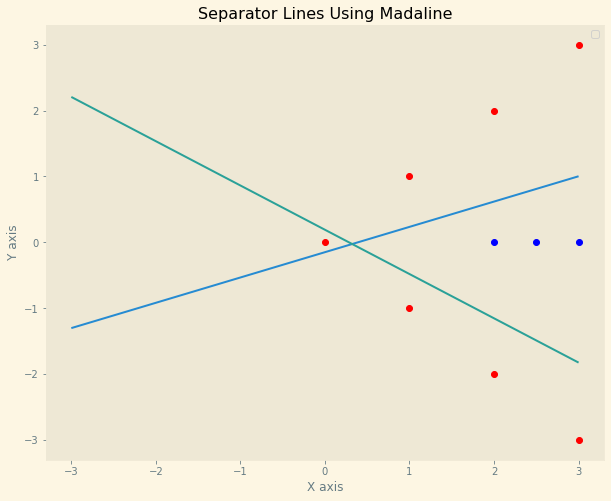

In [4]:
##Number of Perceptrons
n = 2
niter = 10000
np.random.seed(1)
##Initial Random Weights and biases
W0 =   np.random.rand(n,2)
b0 = np.random.rand(n)

W,b,output = perceptron+(x,t,W0,b0,n,niter)
xx,y1,y2 = line_coordinates(W,b)

plt.style.use('Solarize_Light2')
plt.figure(figsize=(10, 8))
plt.title("Separator Lines Using Madaline")
plt.xlabel("X axis")
plt.ylabel("Y axis")
#########################
plt.scatter(x[idx0,0],x[idx0,1],color = "blue")
plt.scatter(x[idx1,0],x[idx1,1],color = "red")
plt.plot(xx,y1)
plt.plot(xx,y2)


plt.legend()
plt.grid()
plt.show()

